In [7]:
#prac2 : Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets

# Cell 1: Step-1: Import Library
import pandas as pd
# Cell 2: Step-2: Import the files to Google Colab
url = 'https://raw.githubusercontent.com/rcdbe/bigdatacertification/master/dataset/churn_trasnsformed_new.csv'
df_csv = pd.read_csv(url, sep=',')
df_csv.head()


Unnamed: 0  gender_0  gender_1  SeniorCitizen_0  SeniorCitizen_1  \
0           0         0         1                0                1   
1           1         1         0                0                1   
2           2         1         0                0                1   
3           3         1         0                0                1   
4           4         0         1                0                1   

   Partner_0  Partner_1  Dependents_0  Dependents_1  tenure  ...  Contract_1  \
0          0          1             0             1       1  ...           0   
1          1          0             0             1      34  ...           1   
2          1          0             0             1       2  ...           0   
3          1          0             0             1      45  ...           1   
4          1          0             0             1       2  ...           0   

   Contract_2  PaperlessBilling_0  PaperlessBilling_1  PaymentMethod_0  \
0           1                   0                   1                0   
1           0                   1                   0                0   
2           1                   0                   1                0   
3           0                   1                   0                0   
4           1                   0                   1                0   

   PaymentMethod_1  PaymentMethod_2  MonthlyCharges  TotalCharges  Churn  
0                0                1            2985        2985.0      0  
1                1                0            5695       18895.0      0  
2                1                0            5385       10815.0      1  
3                1                1             423      184075.0      0  
4                0                1             707       15165.0      1  

[5 rows x 47 columns]

In [6]:
# Cell 3: Step-3: Remove "Unnamed: 0" Column
df = df_csv.drop("Unnamed: 0", axis=1)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender_0            7043 non-null   int64  
 1   gender_1            7043 non-null   int64  
 2   SeniorCitizen_0     7043 non-null   int64  
 3   SeniorCitizen_1     7043 non-null   int64  
 4   Partner_0           7043 non-null   int64  
 5   Partner_1           7043 non-null   int64  
 6   Dependents_0        7043 non-null   int64  
 7   Dependents_1        7043 non-null   int64  
 8   tenure              7043 non-null   int64  
 9   PhoneService_0      7043 non-null   int64  
 10  PhoneService_1      7043 non-null   int64  
 11  MultipleLines_0     7043 non-null   int64  
 12  MultipleLines_1     7043 non-null   int64  
 13  MultipleLines_2     7043 non-null   int64  
 14  InternetService_0   7043 non-null   int64  
 15  InternetService_1   7043 non-null   int64  
 16  Intern

In [5]:
# Cell 4: Step-4: Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Initialize min-max scaler
mm_scaler = MinMaxScaler()
column_names = df.columns.tolist()
column_names.remove('Churn')
df[column_names] = mm_scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)
df.head()


gender_0  gender_1  SeniorCitizen_0  SeniorCitizen_1  Partner_0  Partner_1  \
0       0.0       1.0              0.0              1.0        0.0        1.0   
1       1.0       0.0              0.0              1.0        1.0        0.0   
2       1.0       0.0              0.0              1.0        1.0        0.0   
3       1.0       0.0              0.0              1.0        1.0        0.0   
4       0.0       1.0              0.0              1.0        1.0        0.0   

   Dependents_0  Dependents_1    tenure  PhoneService_0  ...  Contract_1  \
0           0.0           1.0  0.013889             0.0  ...         0.0   
1           0.0           1.0  0.472222             1.0  ...         1.0   
2           0.0           1.0  0.027778             1.0  ...         0.0   
3           0.0           1.0  0.625000             0.0  ...         1.0   
4           0.0           1.0  0.027778             1.0  ...         0.0   

   Contract_2  PaperlessBilling_0  PaperlessBilling_1  PaymentMethod_0  \
0         1.0                 0.0                 1.0              0.0   
1         0.0                 1.0                 0.0              0.0   
2         1.0                 0.0                 1.0              0.0   
3         0.0                 1.0                 0.0              0.0   
4         1.0                 0.0                 1.0              0.0   

   PaymentMethod_1  PaymentMethod_2  MonthlyCharges  TotalCharges  Churn  
0              0.0              1.0        0.250169      0.003420      0  
1              1.0              0.0        0.478745      0.021766      0  
2              1.0              0.0        0.452598      0.012449      1  
3              1.0              1.0        0.034076      0.212235      0  
4              0.0              1.0        0.058030      0.017465      1  

[5 rows x 46 columns]

In [4]:
# Cell 5: Step-5: Selecting the Feature by removing the unused feature
feature = ['Churn']
train_feature = df.drop(feature, axis=1)
train_target = df["Churn"]
train_feature.head(5)


gender_0  gender_1  SeniorCitizen_0  SeniorCitizen_1  Partner_0  Partner_1  \
0       0.0       1.0              0.0              1.0        0.0        1.0   
1       1.0       0.0              0.0              1.0        1.0        0.0   
2       1.0       0.0              0.0              1.0        1.0        0.0   
3       1.0       0.0              0.0              1.0        1.0        0.0   
4       0.0       1.0              0.0              1.0        1.0        0.0   

   Dependents_0  Dependents_1    tenure  PhoneService_0  ...  Contract_0  \
0           0.0           1.0  0.013889             0.0  ...         0.0   
1           0.0           1.0  0.472222             1.0  ...         0.0   
2           0.0           1.0  0.027778             1.0  ...         0.0   
3           0.0           1.0  0.625000             0.0  ...         0.0   
4           0.0           1.0  0.027778             1.0  ...         0.0   

   Contract_1  Contract_2  PaperlessBilling_0  PaperlessBilling_1  \
0         0.0         1.0                 0.0                 1.0   
1         1.0         0.0                 1.0                 0.0   
2         0.0         1.0                 0.0                 1.0   
3         1.0         0.0                 1.0                 0.0   
4         0.0         1.0                 0.0                 1.0   

   PaymentMethod_0  PaymentMethod_1  PaymentMethod_2  MonthlyCharges  \
0              0.0              0.0              1.0        0.250169   
1              0.0              1.0              0.0        0.478745   
2              0.0              1.0              0.0        0.452598   
3              0.0              1.0              1.0        0.034076   
4              0.0              0.0              1.0        0.058030   

   TotalCharges  
0      0.003420  
1      0.021766  
2      0.012449  
3      0.212235  
4      0.017465  

[5 rows x 45 columns]

In [8]:
# Cell 6: Step-6: Split and Show Training Data
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(train_feature, train_target, shuffle=True, test_size=0.3, random_state=1)
X_train.head()


gender_0  gender_1  SeniorCitizen_0  SeniorCitizen_1  Partner_0  \
5925       1.0       0.0              0.0              1.0        1.0   
4395       0.0       1.0              0.0              1.0        0.0   
1579       1.0       0.0              1.0              0.0        0.0   
1040       1.0       0.0              1.0              0.0        1.0   
1074       1.0       0.0              0.0              1.0        1.0   

      Partner_1  Dependents_0  Dependents_1    tenure  PhoneService_0  ...  \
5925        0.0           0.0           1.0  0.277778             1.0  ...   
4395        1.0           1.0           0.0  0.958333             1.0  ...   
1579        1.0           0.0           1.0  0.166667             1.0  ...   
1040        0.0           0.0           1.0  0.194444             1.0  ...   
1074        0.0           0.0           1.0  0.013889             1.0  ...   

      Contract_0  Contract_1  Contract_2  PaperlessBilling_0  \
5925         0.0         1.0         0.0                 0.0   
4395         0.0         0.0         1.0                 0.0   
1579         0.0         0.0         1.0                 0.0   
1040         0.0         0.0         1.0                 1.0   
1074         0.0         0.0         1.0                 1.0   

      PaperlessBilling_1  PaymentMethod_0  PaymentMethod_1  PaymentMethod_2  \
5925                 1.0              0.0              0.0              1.0   
4395                 1.0              0.0              0.0              1.0   
1579                 1.0              0.0              0.0              1.0   
1040                 0.0              1.0              0.0              0.0   
1074                 0.0              0.0              1.0              0.0   

      MonthlyCharges  TotalCharges  
5925        0.056343      0.016308  
4395        0.875169      0.085848  
1579        0.676957      0.010935  
1040        0.761302      0.014578  
1074        0.016194      0.000221  

[5 rows x 45 columns]

In [9]:
# Cell 7: Task-2, Step-1: Import Library for ANN Model
from sklearn.neural_network import MLPClassifier
# Cell 8: Step-2: Fitting Model
mlp = MLPClassifier(hidden_layer_sizes=(5), activation='relu', solver='adam', max_iter=10000, verbose=True)
mlp = mlp.fit(X_train, y_train)

# Prediction to Test Dataset
y_predmlp = mlp.predict(X_test)


Iteration 1, loss = 0.55600898
Iteration 2, loss = 0.52921798
Iteration 3, loss = 0.51223143
Iteration 4, loss = 0.50070390
Iteration 5, loss = 0.49270540
Iteration 6, loss = 0.48613993
Iteration 7, loss = 0.48111006
Iteration 8, loss = 0.47677067
Iteration 9, loss = 0.47318461
Iteration 10, loss = 0.47008626
Iteration 11, loss = 0.46731058
Iteration 12, loss = 0.46479571
Iteration 13, loss = 0.46253417
Iteration 14, loss = 0.46056168
Iteration 15, loss = 0.45861605
Iteration 16, loss = 0.45698228
Iteration 17, loss = 0.45534332
Iteration 18, loss = 0.45379324
Iteration 19, loss = 0.45250112
Iteration 20, loss = 0.45108081
Iteration 21, loss = 0.45001287
Iteration 22, loss = 0.44890757
Iteration 23, loss = 0.44777889
Iteration 24, loss = 0.44686843
Iteration 25, loss = 0.44578894
Iteration 26, loss = 0.44514151
Iteration 27, loss = 0.44413525
Iteration 28, loss = 0.44337888
Iteration 29, loss = 0.44245115
Iteration 30, loss = 0.44185069
Iteration 31, loss = 0.44126440
Iteration 32, los

In [10]:
# Cell 9: Step-3: Print the Number of layers and Iterations
print('Number of Layer =', mlp.n_layers_)
print('Number of Iteration =', mlp.n_iter_)
print('Current loss computed with the loss function =', mlp.loss_)


Number of Layer = 3
Number of Iteration = 225
Current loss computed with the loss function = 0.4202693666851778


In [11]:
# Cell 10: Step-4: Import the metrics class and store Confusion Matrix
from sklearn import metrics

cnf_matrixmlp = metrics.confusion_matrix(y_test, y_predmlp)
cnf_matrixmlp


array([[1397,  188],
       [ 217,  311]])

In [12]:
# Cell 11: Step-5: Show Accuracy, Precision, Recall, F1, etc.
acc_mlp = metrics.accuracy_score(y_test, y_predmlp)
prec_mlp = metrics.precision_score(y_test, y_predmlp)
rec_mlp = metrics.recall_score(y_test, y_predmlp)
f1_mlp = metrics.f1_score(y_test, y_predmlp)
kappa_mlp = metrics.cohen_kappa_score(y_test, y_predmlp)

print(f"Accuracy: {acc_mlp}, Precision: {prec_mlp}, Recall: {rec_mlp}, F1: {f1_mlp}, Kappa: {kappa_mlp}")


Accuracy: 0.808329389493611, Precision: 0.6232464929859719, Recall: 0.5890151515151515, F1: 0.6056475170399221, Kappa: 0.4791787753323429


<Axes: >

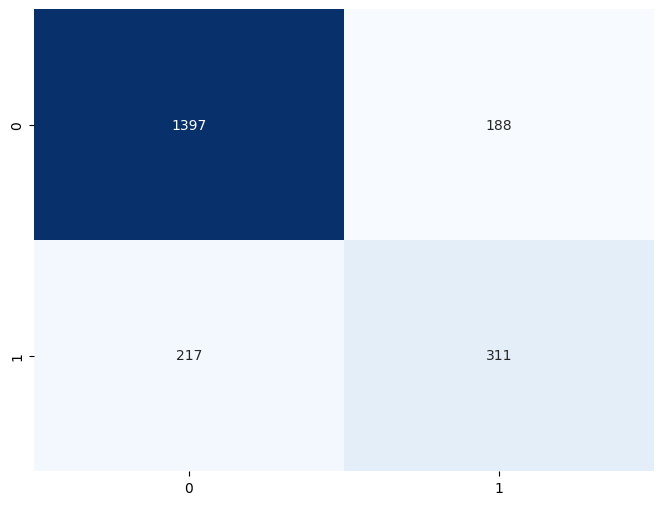

In [13]:
# Cell 12: Task-3, Step-1: Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Cell 13: Step-2: Compute the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_predmlp)
# Cell 14: Step-3: Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


Text(0.5, 1.0, 'Confusion Matrix')

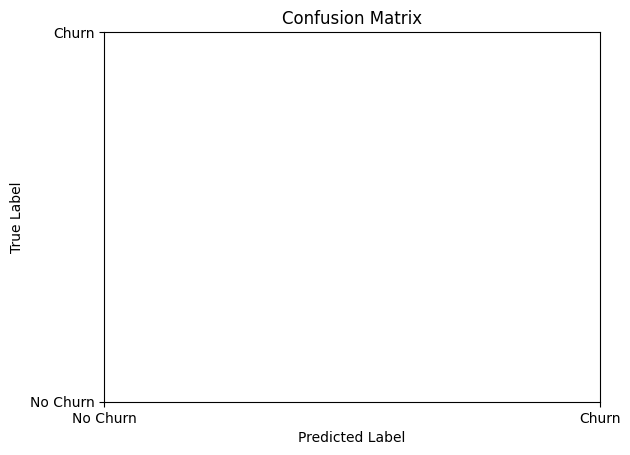

In [14]:
# Cell 15: Step-4: Set labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')


In [16]:
# Cell 16: Step-5: Display the plot
plt.show()
